# LAND LEASE PRICE RECOMMENDER

### Import dependencies

In [ ]:
#import libraries
import pandas as pd 
import numpy as np
import random
import math
#import source data
url_1 = 'https://raw.githubusercontent.com/PhilipHarvey20/Land-Lease-Price-Generator/master/acreage_price_by_state.csv'

### How features contribute to price

In [ ]:
#  BASE_STATE_PRC_HUNTING: avg price per acre by state
#  Minimum of $65 for daily hunts
#  ACREAGE_PRICE_DAILY: ((log(acreage)) * (BASE_STATE_PRC_HUNTING))/30

### Create dataframe

In [ ]:
# import csv
df = pd.read_csv(url_1)
# Create list of 50 unique states from the imported csv
STATE_LIST = df['STATE'].to_list()
# Create state price per acre lookup to join onto dataframe later
STATE_PRC_PER_ACRE_LOOKUP = df.drop_duplicates()
# Generate dataframe of 10k random states with base acreage price per state
random_list_10k_states = [STATE_LIST[random.randrange(len(STATE_LIST))] for i in range(10000)]
df = pd.DataFrame (random_list_10k_states, columns = ['STATE'])

In [ ]:
df.shape

(10000, 1)

In [ ]:
cols = ['STATE']
df = df.join(STATE_PRC_PER_ACRE_LOOKUP.set_index(cols), on=cols)
df.shape

(10000, 2)

In [ ]:
df.shape

(10000, 2)

### Populate df with activity type, acreage, duration, and price

In [ ]:
# rename column
df.rename(columns = {'STATE_PRC_PER_ACRE':'BASE_STATE_PRC_HUNTING'},inplace = True)

# Randomly populate activities, acreages in df
activities = ['HUNTING','FISHING','CAMPING','HIKING','METAL DETECTING','FARMING','SHED ANTLERS','ARTIFACT HUNTING']
df['ACREAGE'] = np.random.randint(1, 2000, df.shape[0])
df['ACTIVITY_TYPE'] = np.random.choice(list(activities), len(df))

# Calculate ACREAGE_PRICE_DAILY using the following formula: (log(acreage) * (base_state_price))/30
df['ACREAGE_PRICE_DAILY'] = np.nan
df['LOG_BASE_STATE_PRC_HUNTING'] = np.log2(df.BASE_STATE_PRC_HUNTING)
df.loc[df['ACTIVITY_TYPE']=='HUNTING', ['ACREAGE_PRICE_DAILY']] = df['LOG_BASE_STATE_PRC_HUNTING'] * df['ACREAGE']
df['ACREAGE_PRICE_DAILY'] = df['ACREAGE_PRICE_DAILY'].div(30).round(2)

# Randomly generate duration (i.e. # of days rented)
df['DURATION_days'] = np.random.randint(1, 365, df.shape[0])
df = df[['ACTIVITY_TYPE','STATE','DURATION_days','BASE_STATE_PRC_HUNTING','ACREAGE','ACREAGE_PRICE_DAILY']]

### Set minimum daily hunting price to $65

In [ ]:
# Set the minimum daily acreage price to $65
df.loc[(df['ACTIVITY_TYPE']=='HUNTING') & (df['ACREAGE_PRICE_DAILY']<65), 'ACREAGE_PRICE_DAILY'] = 65

### Apply duration discount

In [21]:
df['duration_discount'] = [.85 if x > 0 and x < 7
                             else .8 if x >= 7 and x < 30
                             else .65 if x >= 30 and x < 90
                             else .60 if x  >= 90 and x < 180
                             else .4 for x in df['DURATION_days']]
df['TOTAL_ACREAGE_PRICE'] = (df['DURATION_days'] * df['ACREAGE_PRICE_DAILY'] * df['duration_discount']).round(2)

In [22]:
HUNTING = df[df['ACTIVITY_TYPE']=='HUNTING']

<AxesSubplot:xlabel='ACREAGE', ylabel='TOTAL_ACREAGE_PRICE'>

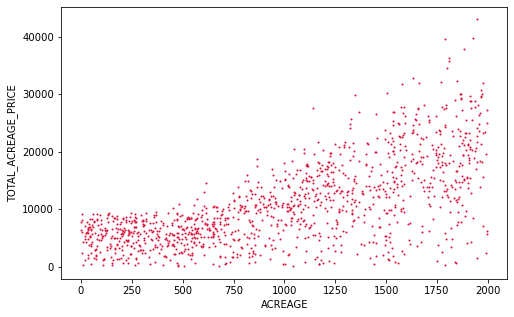

In [23]:
HUNTING.plot(kind='scatter', x='ACREAGE', y='TOTAL_ACREAGE_PRICE', s=1, c='crimson', figsize=(8, 5))

<AxesSubplot:xlabel='DURATION_days', ylabel='TOTAL_ACREAGE_PRICE'>

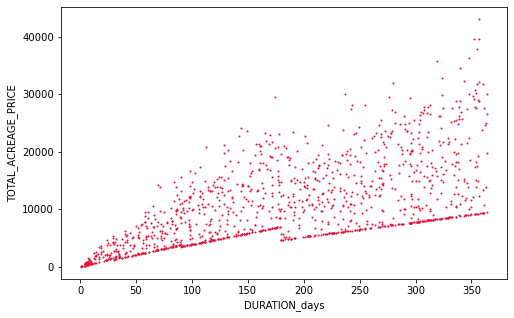

In [24]:
HUNTING.plot(kind='scatter', x='DURATION_days', y='TOTAL_ACREAGE_PRICE', s=1, c='crimson', figsize=(8, 5))

In [28]:
df[df['ACTIVITY_TYPE']=='HUNTING'].head(30)

,ACTIVITY_TYPE,STATE,DURATION_days,BASE_STATE_PRC_HUNTING,ACREAGE,ACREAGE_PRICE_DAILY,duration_discount,TOTAL_ACREAGE_PRICE
2,HUNTING,Mississippi,346,10.0,1405,155.58,0.40,21532.27
7,HUNTING,Iowa,98,35.0,1402,239.71,0.60,14094.95
9,HUNTING,Pennsylvania,7,16.0,155,65.00,0.80,364.00
17,HUNTING,Maine,257,10.0,707,78.29,0.40,8048.21
23,HUNTING,Kentucky,96,14.0,363,65.00,0.60,3744.00
30,HUNTING,Ohio,237,28.5,1971,317.52,0.40,30100.90
33,HUNTING,Wyoming,351,10.0,776,85.93,0.40,12064.57
60,HUNTING,Texas,246,10.0,33,65.00,0.40,6396.00
75,HUNTING,West Virginia,129,11.0,194,65.00,0.60,5031.00
82,HUNTING,Wisconsin,98,24.0,1850,282.74,0.60,16625.11
